# Detailed analysis of results

Here, the datasets are investigated in detail to potentially highlight why the performance of models differ from topic to topic.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Text Length

Invastigate correctness for different text lengths.

In [1]:
import pandas as pd

In [4]:
all_pred_path = "/content/drive/My Drive/BA THESIS/all_predictions.csv"
all_pred_df = pd.read_csv(all_pred_path)
all_pred_df.head()

,Topic,Text,Actual,NB_pred,BERT_pred
0,movie,catalog every bodily fluids gag something mary,neutral,negative,neutral
1,movie,incredibly flexible cast,positive,positive,positive
2,twitter,shameful statement aap sanjay singh downgrade ...,neutral,negative,neutral
3,twitter,name hindu terrorist spread hates modi govt ac...,neutral,negative,neutral
4,twitter,send modi shah pakistan,neutral,neutral,neutral


Add a column  for the word count. Add NB_right and BERT_right columns, these are true for correct classifications and false for incorrect ones.

In [5]:
all_pred_df['word_count'] = all_pred_df['Text'].str.split().str.len()

In [7]:
all_pred_df['NB_right'] = all_pred_df['Actual'] == all_pred_df['NB_pred']
all_pred_df['BERT_right'] = all_pred_df['Actual'] == all_pred_df['BERT_pred']

In [9]:
all_pred_df.head(10)

,Topic,Text,Actual,NB_pred,BERT_pred,word_count,NB_right,BERT_right
0,movie,catalog every bodily fluids gag something mary,neutral,negative,neutral,7,False,True
1,movie,incredibly flexible cast,positive,positive,positive,3,True,True
2,twitter,shameful statement aap sanjay singh downgrade ...,neutral,negative,neutral,8,False,True
3,twitter,name hindu terrorist spread hates modi govt ac...,neutral,negative,neutral,17,False,True
4,twitter,send modi shah pakistan,neutral,neutral,neutral,4,True,True
5,twitter,vote remember past one family desire power cos...,positive,negative,positive,20,False,True
6,news,victory pret manger means fight misleading labels,positive,negative,negative,7,False,False
7,finance,bbry sierra great cash balance impressive grow...,positive,positive,positive,11,True,True
8,finance,strongest growth seen new markets russia czech...,positive,neutral,positive,9,False,True
9,movie,love movie,positive,positive,positive,2,True,True


Now the distribution of word counts is compared for false and correct classifications.

In [10]:
def classification_by_length():

  df_length = pd.DataFrame(columns=['classification', 'average_words', 'median_words', 'shortest', 'longest'])
  for i in (True, False):
    for m in ("NB_right", "BERT_right"):
      sub_df = all_pred_df[all_pred_df[m] == i]
      average_words = sub_df['word_count'].mean()
      median_words = sub_df['word_count'].median()
      shortest = sub_df['word_count'].min()
      longest = sub_df['word_count'].max()
      df_length.loc[len(df_length)] = [ (i,m), average_words, median_words, shortest, longest]
  return df_length


In [12]:
performance_by_length = classification_by_length()
performance_by_length.to_csv("/content/drive/My Drive/BA THESIS/analysis/performance_by_length.csv")
performance_by_length

,classification,average_words,median_words,shortest,longest
0,"(True, NB_right)",9.505731,8.0,1,43
1,"(True, BERT_right)",9.230895,8.0,1,49
2,"(False, NB_right)",8.956806,7.0,1,49
3,"(False, BERT_right)",9.434494,8.0,1,33


There seems to be no significant correlation between misclassification and text length. The median of misclassified and correctly classified inputs are almost the same.

In [13]:
# Provide the correct file path
file_path_train = "/content/drive/My Drive/BA THESIS/data/train_BERT.csv"
file_path_test = "/content/drive/My Drive/BA THESIS/data/test_BERT.csv"


# Load CSV
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

In [14]:
all_df = pd.concat([train_df, test_df], ignore_index=True)

In [15]:
def input_lengths (data):
  data['word_count'] = data['text'].str.split().str.len()
  topics = data['topic'].unique()
  df_length = pd.DataFrame(columns=['topic', 'average_words', 'median_words', 'shortest', 'longest'])
  for topic in topics:
    topic_df = data[data['topic'] == topic]
    average_words = topic_df['word_count'].mean()
    median_words = topic_df['word_count'].median()
    shortest = topic_df['word_count'].min()
    longest = topic_df['word_count'].max()
    df_length.loc[len(df_length)] = [topic, average_words, median_words, shortest, longest]
  return df_length


In [17]:
word_counts = input_lengths(all_df)
word_counts.to_csv("/content/drive/My Drive/BA THESIS/analysis/word_counts_train_and_test.csv")
word_counts

,topic,average_words,median_words,shortest,longest
0,news,7.938355,8.0,2,19
1,twitter,14.101519,13.0,1,39
2,movie,4.257812,3.0,1,24
3,reddit,10.376836,8.0,1,49
4,finance,11.112994,10.0,2,31


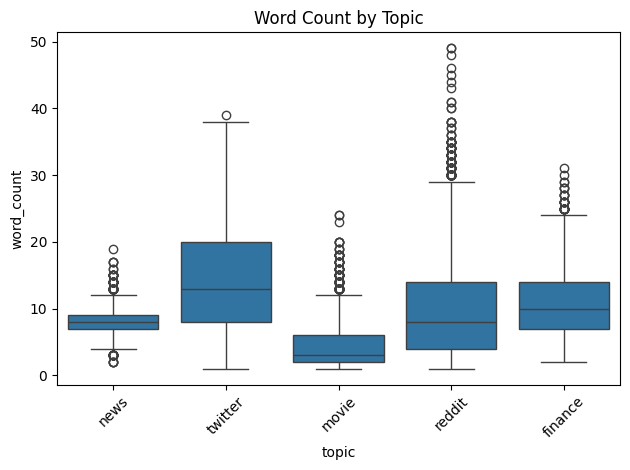

In [18]:
# Boxplot of word count

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(x='topic', y='word_count', data=all_df)
plt.xticks(rotation=45)
plt.title('Word Count by Topic')
plt.tight_layout()
plt.show()

## Actual Class

Here it is investigated which class is most often misclassified.

In [21]:
misclassified_NB = all_pred_df[all_pred_df['Actual'] != all_pred_df['NB_pred']]

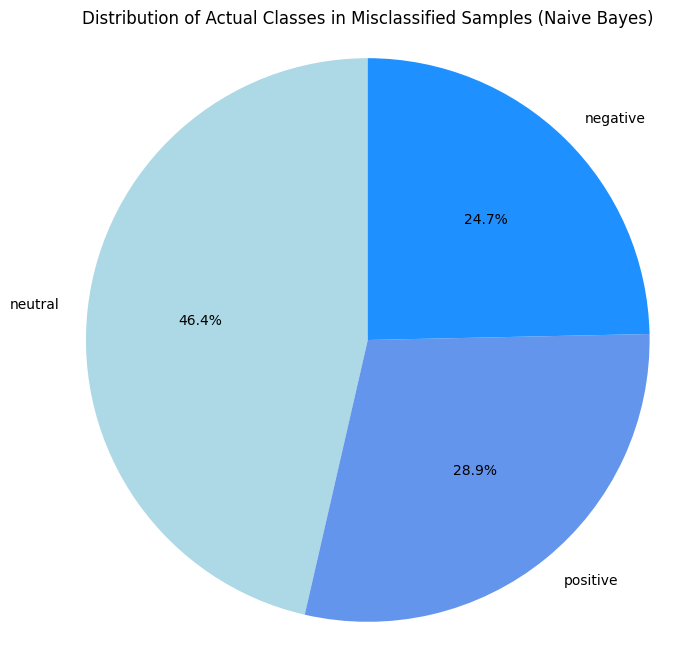

In [25]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
colors = ['#ADD8E6', '#6495ED', '#1E90FF'] #light blue, medium blue, dark blue
plt.pie(misclassified_NB['Actual'].value_counts(), labels=misclassified_NB['Actual'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Actual Classes in Misclassified Samples (Naive Bayes)')
plt.axis('equal')
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/misclassified_NB_pie.png")
plt.show()


It is clear that Naive Bayes has a particularly hard time to correctly classify neutral texts.

In [27]:
misclassified_BERT = all_pred_df[all_pred_df['Actual'] != all_pred_df['BERT_pred']]

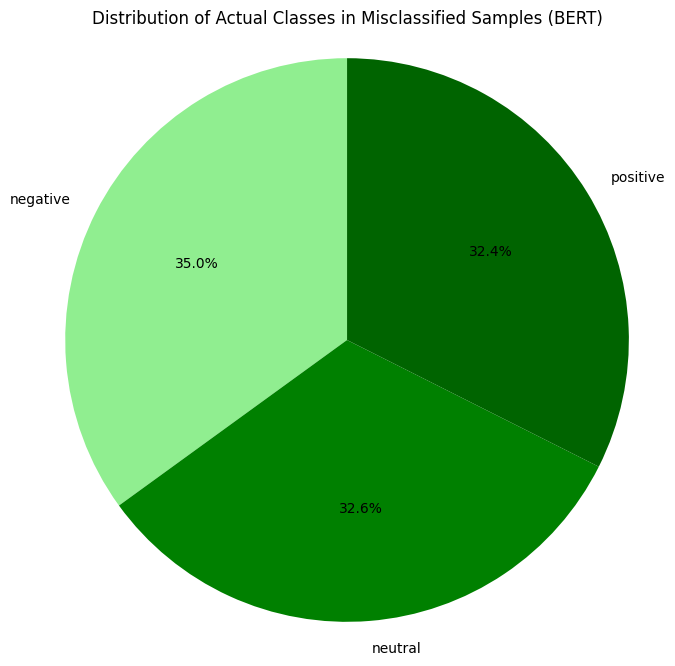

In [28]:
plt.figure(figsize=(8, 8))
colors = ['lightgreen', 'green', 'darkgreen'] #light blue, medium blue, dark blue
plt.pie(misclassified_BERT['Actual'].value_counts(), labels=misclassified_BERT['Actual'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Actual Classes in Misclassified Samples (BERT)')
plt.axis('equal')
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/misclassified_BERT_pie.png")
plt.show()


Unlike with naive Bayes, BERT has a relatively uniform distribution of misclassified text across all threee sentiments.

## Vocabulary

Here it is investigated how much repetition there is in words for each topic.

In [29]:
# Provide the correct file path
file_path_train = "/content/drive/My Drive/BA THESIS/data/train_NB_lem.csv"
file_path_test = "/content/drive/My Drive/BA THESIS/data/test_NB_lem.csv"


# Load CSV
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

In [30]:
all_df = pd.concat([train_df, test_df], ignore_index=True)

In [32]:

def analyze_vocabulary(df):

    results = []
    for topic in df['topic'].unique():
        topic_df = df[df['topic'] == topic]
        unique_words = set()
        for text in topic_df['text']:
            if isinstance(text, str):  # Handle potential NaN values
              unique_words.update(text.split())
        observations = len(topic_df)
        results.append([topic, len(unique_words), observations, len(unique_words) / observations if observations > 0 else 0])

    return pd.DataFrame(results, columns=['topic', 'unique_words', 'observations', 'unique_words_per_observation'])

vocabulary_analysis_result = analyze_vocabulary(all_df)
vocabulary_analysis_result


,topic,unique_words,observations,unique_words_per_observation
0,news,5858,4169,1.405133
1,twitter,11459,5398,2.122823
2,movie,5359,5376,0.996838
3,reddit,10690,5379,1.987358
4,finance,4314,1593,2.708098


In [33]:
vocabulary_analysis_result.to_csv("/content/drive/My Drive/BA THESIS/analysis/vocabulary_rep_analysis_result.csv")